# Question 1

Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate,epochs,penalty='None',alpha=0):
        self.lr=learning_rate
        self.epochs=epochs
        self.penalty = penalty
        self.alpha=alpha

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        # gradient descent
        for i in range(self.epochs):
            delta= -2*(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            dw=0
            if self.penalty == 'l1':
                dw= np.dot(X_train.T,delta)+ self.alpha
            elif self.penalty == 'l2':
                dw= np.dot(X_train.T,delta) + 2*self.alpha*np.sum(self.weights)
            else:
                dw= np.dot(X_train.T,delta)

            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        return y_predicted

# Question 2
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>. You may require to convert the data to numpy arrays if any error arises.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/real-estate-price-prediction/Real estate.csv


In [ ]:
df = pd.read_csv("/kaggle/input/real-estate-price-prediction/Real estate.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
cols = list(df.columns)
cols.remove('No')
cols.remove('Y house price of unit area')
cols.remove('X1 transaction date')
cols

['X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude']

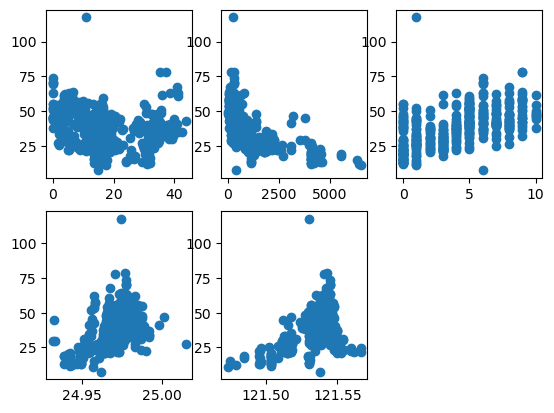

In [ ]:
import matplotlib.pyplot as plt
i=1
for col in cols:
    plt.subplot(2,3,i)
    i+=1
    plt.scatter(df[col],df['Y house price of unit area'])

In [ ]:
X=df[cols]
y=df['Y house price of unit area']
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.25,random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(310, 5)
(310,)
(104, 5)
(104,)


In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
reg1= LinearRegression(learning_rate=0.01,epochs=3000)
reg2= LinearRegression(learning_rate=0.01,epochs=3000,penalty='l1',alpha=0.015)
reg3= LinearRegression(learning_rate=0.01,epochs=3000,penalty='l2',alpha=0.015)

reg1.fit(X_train,y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

y_pred=reg1.predict(X_test)
print(mse(y_test,y_pred))
print(r2_score(y_test,y_pred))

y_pred=reg2.predict(X_test)
print(mse(y_test,y_pred))
print(r2_score(y_test,y_pred))

y_pred=reg3.predict(X_test)
print(mse(y_test,y_pred))
print(r2_score(y_test,y_pred))

84.79287588161228
0.5109688610404888
84.73433399809241
0.5113064932257035
83.6703124741558
0.5174430896356973


In [ ]:
from sklearn.linear_model import LinearRegression as Linreg,Lasso,Ridge

reg1= Linreg()
reg2= Lasso()
reg3= Ridge()

reg1.fit(X_train,y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)

Ridge()

In [ ]:
y_pred=reg1.predict(X_test)
print(mse(y_test,y_pred))
print(r2_score(y_test,y_pred))

y_pred=reg2.predict(X_test)
print(mse(y_test,y_pred))
print(r2_score(y_test,y_pred))

y_pred=reg3.predict(X_test)
print(mse(y_test,y_pred))
print(r2_score(y_test,y_pred))

80.41386904231409
0.5362241750025178
121.50017678477681
0.2992645995425389
81.985316472652
0.5271610701286353


##Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Create a train-test-split. Take any suitable test size.

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
Y=data.target
X = data.data
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


4. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question.

In [ ]:
import numpy as np
def sigmoid(z):
    a=1.0/(1.0+ np.exp(-z))
    return a
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate,epochs,penalty='None',alpha=0):
        self.lr=learning_rate
        self.epochs=epochs
        self.penalty = penalty
        self.alpha=alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias= np.random.randn(1,1)

        for i in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)


            dw = -np.dot(X.T,(y - y_pred))/n_samples

            if self.penalty == 'l1':
                dw += self.alpha
            elif self.penalty == 'l2':
                dw += 2*self.alpha*np.sum(self.weights)

            db = -np.sum(y - y_pred)/n_samples
            self.weights -= self.lr* dw
            self.bias-= self.lr* db

    def predict(self, X):
        y_pred = np.dot(X,self.weights)+self.bias
        Y_proba_pred=y_pred
        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1
        return (Y_proba_pred,y_pred)

5. Fit your model on the dataset and make predictions.
6. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
7. Print accuracy_score in each case using sklearn.metrics .

In [ ]:
# Create an instance of LogisticRegression
logreg1 = LogisticRegression(0.1,3000) #Play around with different learning rates and epochs
logreg2 = LogisticRegression(0.1,3000,penalty='l1',alpha=0.01)
logreg3 = LogisticRegression(0.1,3000,penalty='l1',alpha=0.01)

# Train the model
logreg1.fit(X_train,y_train)
logreg2.fit(X_train,y_train)
logreg3.fit(X_train,y_train)

# Make predictions on the test set
Y_proba_pred1,y_pred1 = logreg1.predict(X_test)
Y_proba_pred2,y_pred2 = logreg2.predict(X_test)
Y_proba_pred3,y_pred3 = logreg3.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred3))

0.972027972027972
0.9440559440559441
0.9440559440559441


In [ ]:
from sklearn.linear_model import LogisticRegression as LR
logreg4 = LR(penalty=None)
logreg5 = LR(penalty='l1',solver='saga')
logreg6 = LR(penalty="l2")
logreg7 = LR(penalty="elasticnet",l1_ratio=0.4,solver='saga')

logreg4.fit(X_train,y_train)
logreg5.fit(X_train,y_train)
logreg6.fit(X_train,y_train)
logreg7.fit(X_train,y_train)

y_pred4 = logreg4.predict(X_test)
y_pred5 = logreg5.predict(X_test)
y_pred6 = logreg6.predict(X_test)
y_pred7 = logreg6.predict(X_test)

print(accuracy_score(y_test,y_pred4))
print(accuracy_score(y_test,y_pred5))
print(accuracy_score(y_test,y_pred6))
print(accuracy_score(y_test,y_pred7))

0.951048951048951
0.965034965034965
0.958041958041958
0.958041958041958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


8. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .


In [ ]:
from sklearn.metrics import classification_report
target_names = data.target_names
print(classification_report(y_test, y_pred1, target_names=target_names))
print(classification_report(y_test, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        52
      benign       0.97      0.99      0.98        91

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

              precision    recall  f1-score   support

   malignant       1.00      0.90      0.95        52
      benign       0.95      1.00      0.97        91

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



9. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred5))

[[49  3]
 [ 1 90]]
[[47  5]
 [ 0 91]]


10. Optional Challenge : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, logreg5.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_test, Y_proba_pred2))

0.9879543533389687
0.9436813186813187


<Figure size 1000x1000 with 0 Axes>

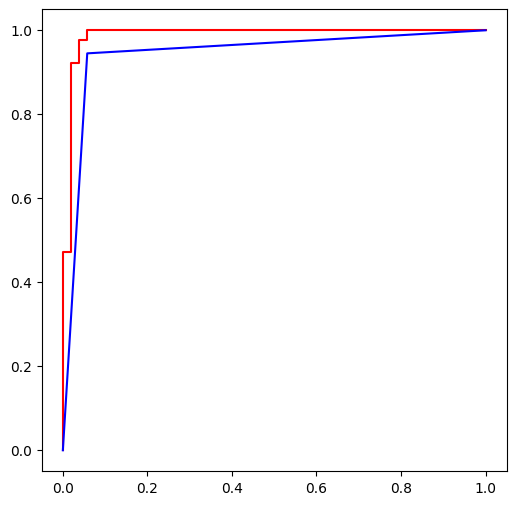

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
fpr1, tpr1, _ = roc_curve(y_test, logreg5.predict_proba(X_test)[:, 1], pos_label=1)
fpr2, tpr2, _= roc_curve(y_test, Y_proba_pred2, pos_label=1)
plt.plot(fpr1,tpr1,color='red')
plt.plot(fpr2,tpr2,color='blue')
plt.show()

#Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)


Build a knn model from scratch. Assign different colours to different classes and plot the data points using matplotlib. Also find the accuracy of the model.  



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as lcm

In [ ]:
def euclidian_distance(x,x1):
  return np.sqrt(np.sum(np.subtract(x,x1)**2))

In [ ]:
class KNN:
    def __init__(self,k):
        self.k=k
    def fit(self,X_train,y_train):
        self.X_train=X_train
        self.y_train=y_train
    def predict(self,X_test):
        y_pred=[]
        for x in X_test:
            distance = [euclidian_distance(x,x1) for x1 in self.X_train]
            k_shortest_indices = np.argsort(distance)[:self.k]
            k_labels = [self.y_train[i] for i in k_shortest_indices]
            common_label = np.bincount(k_labels)
            y_pred.append(np.argmax(common_label))
        return np.array(y_pred)

def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)

In [ ]:
import pandas as pd
data= pd.read_csv('/content/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
x= data.drop('Type',axis=1)
y= data['Type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
clf=KNN(k=3)
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
print(accuracy(predictions,y_test))

0.7407407407407407


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
clf = knn(n_neighbors=3)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7407407407407407

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc,plot_tree
clf=dtc(max_depth=10,criterion="entropy")
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7037037037037037

In [ ]:
plot_tree(clf,max_depth=5)